# **Task 2**

## **Import library**

In [ ]:
import kagglehub
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.8 MB/s eta 0:00:00


In [ ]:
stop_words = set(stopwords.words("english"))


## **Load the data and Exploration**

In [ ]:
# Download latest version
path = kagglehub.dataset_download("amananandrai/ag-news-classification-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ag-news-classification-dataset' dataset.
Path to dataset files: /kaggle/input/ag-news-classification-dataset


In [ ]:
df_ag_news = pd.read_csv(f"{path}/train.csv")
display(df_ag_news.head(10))

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
5,3,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...
6,3,Money Funds Fell in Latest Week (AP),AP - Assets of the nation's retail money marke...
7,3,Fed minutes show dissent over inflation (USATO...,USATODAY.com - Retail sales bounced back a bit...
8,3,Safety Net (Forbes.com),Forbes.com - After earning a PH.D. in Sociolog...
9,3,Wall St. Bears Claw Back Into the Black,"NEW YORK (Reuters) - Short-sellers, Wall Stre..."


In [ ]:
print(df_ag_news['Class Index'].value_counts().to_dict())
# 1 represents World, 2 represents Sports, 3 represents Business and 4 represents Sci/Tech.

{3: 30000, 4: 30000, 2: 30000, 1: 30000}


In [ ]:
df_ag_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [ ]:
df_ag_news.describe()

,Class Index
count,120000.000000
mean,2.500000
std,1.118039
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000


In [ ]:
df_ag_news.isnull().sum()

,0
Class Index,0
Title,0
Description,0


In [ ]:
df_ag_news.describe(include='object')

,Title,Description
count,120000,120000
unique,114350,118723
top,Today's schedule,"With the economy slowly turning up, upgrading ..."
freq,39,15


## **Preprocess**




In [ ]:
def text_prepocessing(text):
    text = text.lower()
    text = text.encode('latin1').decode('utf-8',errors = 'ignore')
    text = text.split()
    for i in range(len(text)):
        text[i] = contractions.fix(text[i]) #straighten up contractions
    text = ' '.join(text)
    text = re.sub(r'\(.*?\)','',text) #remove everything in ()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    text = ' '.join(words)
    text = re.sub(r'[^a-zA-Z0-9.&\- ]','',text) #remove punctuations
    text = text.replace("xc2xa","")
    text = re.sub(r'\(\||\)', '', text) # remove |
    words = text.split() # Split text into words to remove stopwords
    words = [word for word in words if word not in stop_words] # Remove stopwords
    text = ' '.join(words) # Join words back into text
    # text = re.sub(r'\.','.',text) #remove backlash
    text = re.sub(r'\s+', ' ', text) # removes multiple spaces
    return text

In [ ]:
import contractions

df_ag_news['cleaned_title'] = df_ag_news['Title'].apply(text_prepocessing)
df_ag_news['cleaned_description'] = df_ag_news['Description'].apply(text_prepocessing)
display(df_ag_news.head())

,Class Index,Title,Description,cleaned_title,cleaned_description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",wall st. bear claw back black,reuters - short-sellers wall streets dwindling...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,carlyle look toward commercial aerospace,reuters - private investment firm carlyle grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,oil economy cloud stocks outlook,reuters - soaring crude price plus worriesabou...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,iraq halt oil export main southern pipeline,reuters - authority halted oil exportflows mai...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",oil price soar all-time record posing new mena...,afp - tearaway world oil prices toppling recor...


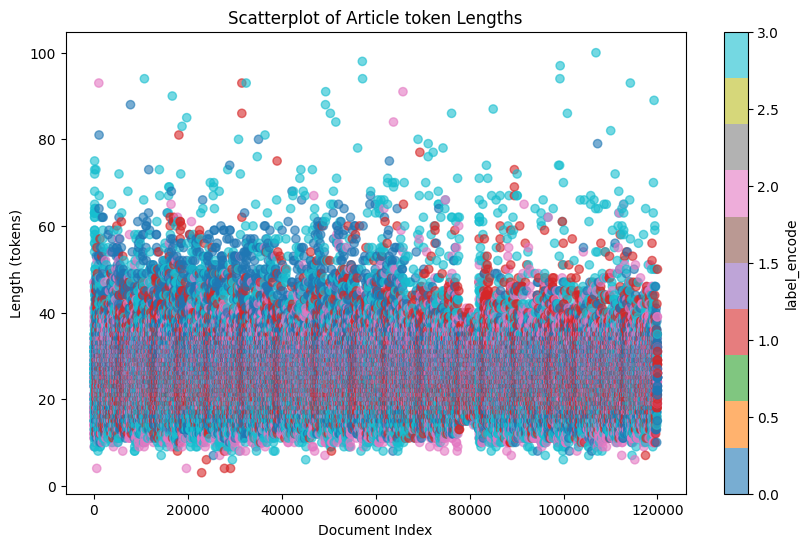

In [ ]:
# Calculate token length and create a numerical label for the categories
df_ag_news['token_length'] = df_ag_news['cleaned_title'].apply(lambda x: len(x.split())) + df_ag_news['cleaned_description'].apply(lambda x: len(x.split()))
df_ag_news['label_encode'] = df_ag_news['Class Index'].astype('category').cat.codes

#scatterplot
plt.figure(figsize=(10,6))
plt.scatter(df_ag_news.index, df_ag_news["token_length"], c=df_ag_news["label_encode"], cmap="tab10", alpha=0.6)
plt.colorbar(label="label_encode")
plt.xlabel("Document Index")
plt.ylabel("Length (tokens)")
plt.title("Scatterplot of Article token Lengths")
plt.show()

## **Split the new dataset**



In [ ]:
X = df_ag_news['cleaned_title'] + " " + df_ag_news['cleaned_description']
y = df_ag_news['Class Index']

X_train_ag, X_test_ag, y_train_ag, y_test_ag = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data splitting complete for AG News dataset.")
print("Training data shape:", X_train_ag.shape)
print("Testing data shape:", X_test_ag.shape)

Data splitting complete for AG News dataset.
Training data shape: (96000,)
Testing data shape: (24000,)


## **Vectorize the new dataset**


In [ ]:
# Initialize TfidfVectorizer for AG News dataset
tfidf_vectorizer_ag = TfidfVectorizer(max_features=2000)

# Fit and transform the training data for AG News dataset
X_train_tfidf_ag = tfidf_vectorizer_ag.fit_transform(X_train_ag)

# Transform the testing data for AG News dataset
X_test_tfidf_ag = tfidf_vectorizer_ag.transform(X_test_ag)

print("Text vectorization complete for AG News dataset.")
print("Training data shape for AG News dataset:", X_train_tfidf_ag.shape)
print("Testing data shape for AG News dataset:", X_test_tfidf_ag.shape)

Text vectorization complete for AG News dataset.
Training data shape for AG News dataset: (96000, 2000)
Testing data shape for AG News dataset: (24000, 2000)


## **Train the models**


In [ ]:
# Initialize and train the Logistic Regression model for AG News dataset
lr_model_ag = LogisticRegression(max_iter=1000)
lr_model_ag.fit(X_train_tfidf_ag, y_train_ag)

# Initialize and train the Naive Bayes model for AG News dataset
nb_model_ag = MultinomialNB()
nb_model_ag.fit(X_train_tfidf_ag, y_train_ag)

print("Model training complete for both Logistic Regression and Naive Bayes on AG News dataset.")

Model training complete for both Logistic Regression and Naive Bayes on AG News dataset.


## **Evaluate the models**


In [ ]:
# Predict on the testing data for Logistic Regression
y_pred_lr_ag = lr_model_ag.predict(X_test_tfidf_ag)

# Evaluate the Logistic Regression model
accuracy_lr_ag = accuracy_score(y_test_ag, y_pred_lr_ag)
report_lr_ag = classification_report(y_test_ag, y_pred_lr_ag)
confusion_mat_lr_ag = confusion_matrix(y_test_ag, y_pred_lr_ag)

print("Logistic Regression Evaluation (AG News Dataset):")
print(f"Accuracy: {accuracy_lr_ag}")
print("Classification Report:")
print(report_lr_ag)
print("Confusion Matrix:")
print(confusion_mat_lr_ag)

Logistic Regression Evaluation (AG News Dataset):
Accuracy: 0.891
Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.89      0.90      5956
           2       0.93      0.96      0.95      6058
           3       0.86      0.86      0.86      5911
           4       0.87      0.85      0.86      6075

    accuracy                           0.89     24000
   macro avg       0.89      0.89      0.89     24000
weighted avg       0.89      0.89      0.89     24000

Confusion Matrix:
[[5294  233  262  167]
 [  96 5829   72   61]
 [ 212   70 5072  557]
 [ 259  104  523 5189]]


In [ ]:
# Predict on the testing data for Naive Bayes
y_pred_nb_ag = nb_model_ag.predict(X_test_tfidf_ag)

# Evaluate the Naive Bayes model
accuracy_nb_ag = accuracy_score(y_test_ag, y_pred_nb_ag)
report_nb_ag = classification_report(y_test_ag, y_pred_nb_ag)
confusion_mat_nb_ag = confusion_matrix(y_test_ag, y_pred_nb_ag)

print("\nNaive Bayes Evaluation (AG News Dataset):")
print(f"Accuracy: {accuracy_nb_ag}")
print("Classification Report:")
print(report_nb_ag)
print("Confusion Matrix:")
print(confusion_mat_nb_ag)


Naive Bayes Evaluation (AG News Dataset):
Accuracy: 0.875375
Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.88      0.88      5956
           2       0.92      0.96      0.94      6058
           3       0.84      0.83      0.83      5911
           4       0.85      0.83      0.84      6075

    accuracy                           0.88     24000
   macro avg       0.87      0.88      0.87     24000
weighted avg       0.87      0.88      0.87     24000

Confusion Matrix:
[[5238  262  305  151]
 [ 106 5821   67   64]
 [ 264   94 4905  648]
 [ 327  129  574 5045]]


## **Compare model performance**



In [ ]:
print("\nModel Comparison (AG News Dataset):")
print(f"Logistic Regression Accuracy: {accuracy_lr_ag:.4f}")
print(f"Naive Bayes Accuracy: {accuracy_nb_ag:.4f}")

if accuracy_lr_ag > accuracy_nb_ag:
    print("Logistic Regression performed better on the AG News dataset.")
elif accuracy_nb_ag > accuracy_lr_ag:
    print("Naive Bayes performed better on the AG News dataset.")
else:
    print("Both models performed equally on the AG News dataset.")


Model Comparison (AG News Dataset):
Logistic Regression Accuracy: 0.8910
Naive Bayes Accuracy: 0.8754
Logistic Regression performed better on the AG News dataset.


# **Bouns Task 2**

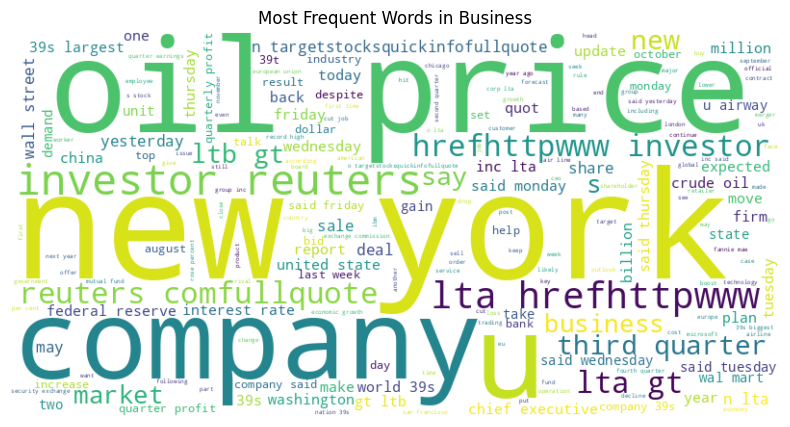

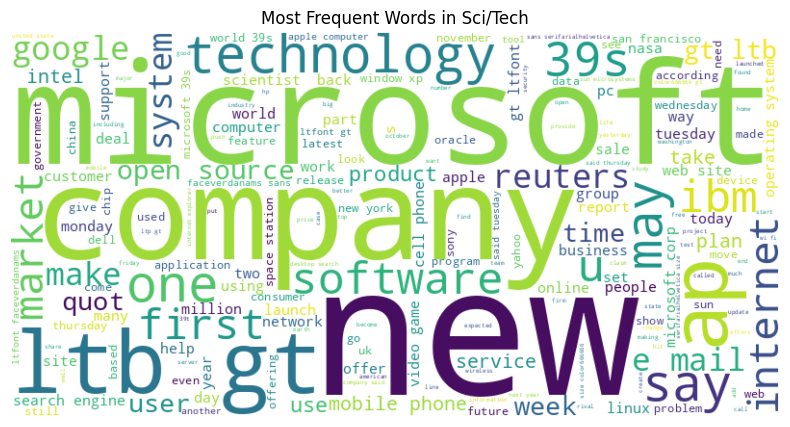

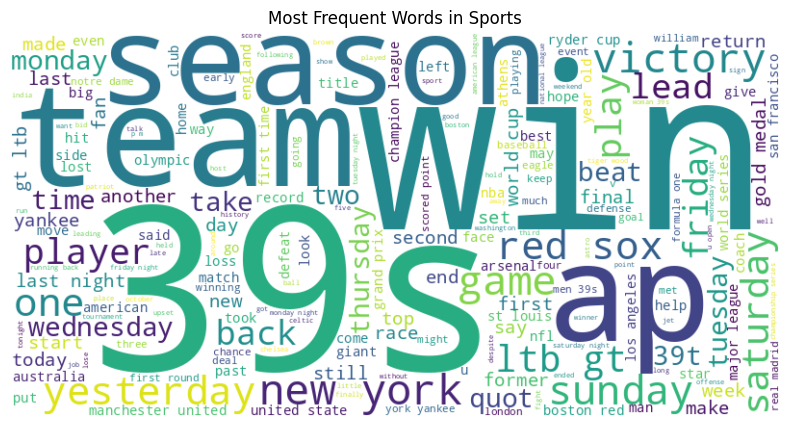

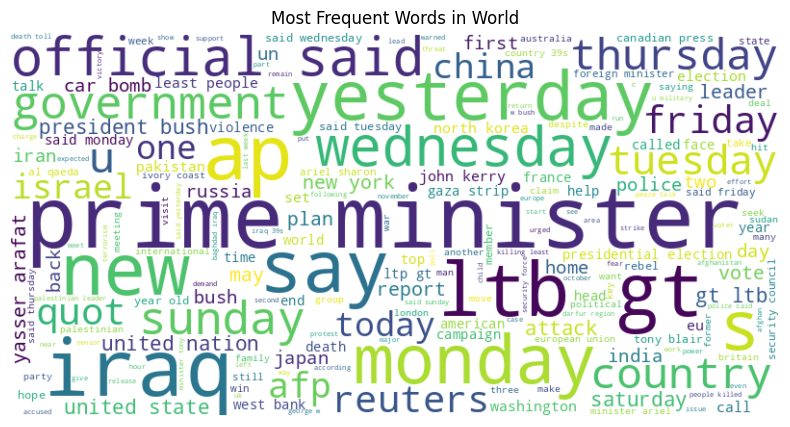

In [ ]:
from collections import Counter
from wordcloud import WordCloud

# Combine title + description for each article
df_ag_news['text_all'] = df_ag_news['cleaned_title'] + " " + df_ag_news['cleaned_description']

# Map Class Index to category names
category_map = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tech"}
df_ag_news['category'] = df_ag_news['Class Index'].map(category_map)

# WordCloud per category
for cat in df_ag_news['category'].unique():
    text = " ".join(df_ag_news[df_ag_news['category'] == cat]['text_all'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Most Frequent Words in {cat}")
    plt.show()



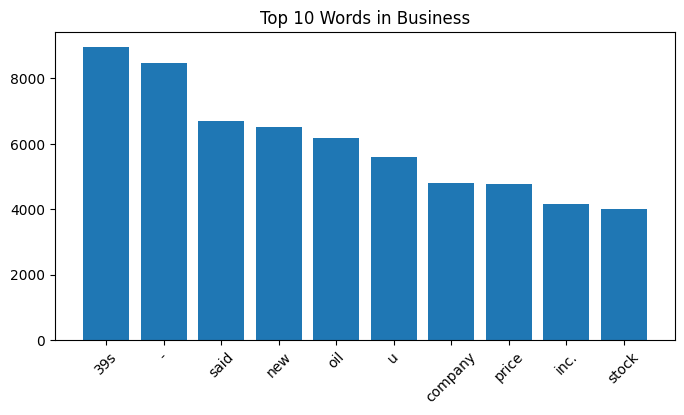

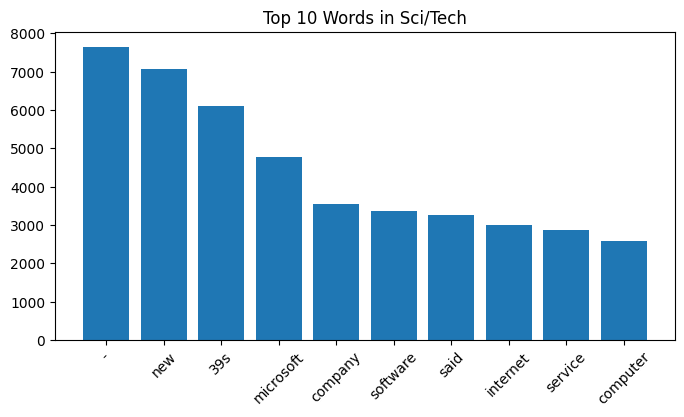

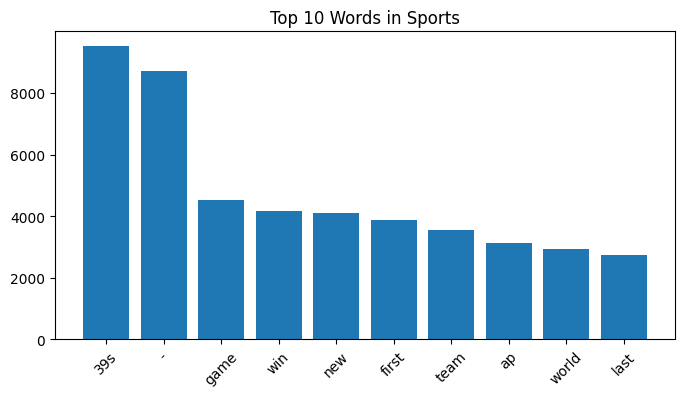

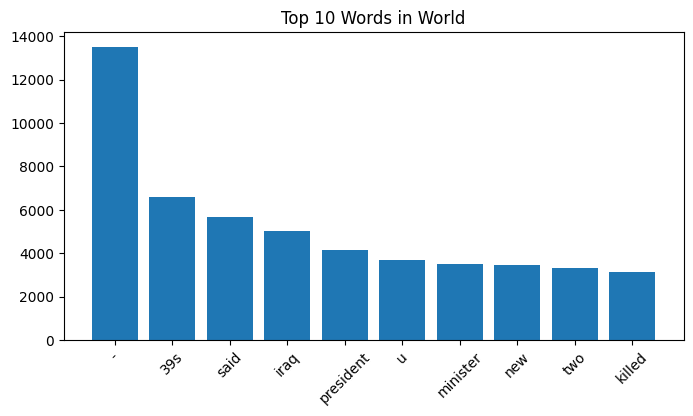

In [ ]:
# Bar plot of top words per category
for cat in df_ag_news['category'].unique():
    text = " ".join(df_ag_news[df_ag_news['category'] == cat]['text_all'])
    words = text.split()
    counter = Counter(words)
    common_words = counter.most_common(10)
    words, counts = zip(*common_words)
    plt.figure(figsize=(8, 4))
    plt.bar(words, counts)
    plt.title(f"Top 10 Words in {cat}")
    plt.xticks(rotation=45)
    plt.show()